# Deep Learning for Image Classification SOLUTION

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## The Data

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

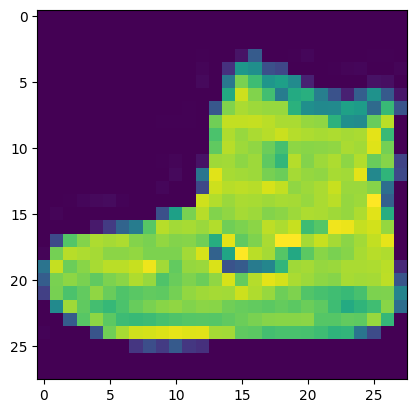

In [4]:
plt.imshow(x_train[0])

In [5]:
y_train[0]

9

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [6]:
x_train.max()

255

In [7]:
x_train = x_train/255

In [8]:
x_test = x_test/255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train.reshape(60000,28,28,1)

In [11]:
x_test = x_test.reshape(10000,28,28,1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
y_cat_train = to_categorical(y_train)

In [15]:
y_cat_test = to_categorical(y_test)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(5,5)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(5,5),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
__________________________________________________

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [19]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 101s 53ms/step - loss: 0.4225 - accuracy: 0.8486
Epoch 2/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.2837 - accuracy: 0.8969
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2427 - accuracy: 0.9120
Epoch 4/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2170 - accuracy: 0.9201
Epoch 5/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1950 - accuracy: 0.9284
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1765 - accuracy: 0.9348
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1646 - accuracy: 0.9402
Epoch 8/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1499 - accuracy: 0.9456
Epoch 9/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1389 - accuracy: 0.9506
Epoch 10/10
1875/1875 [==============================] - 44s 24

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [21]:
model.metrics_names

['loss', 'accuracy']

In [22]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.3060 - accuracy: 0.9126


[0.30604225397109985, 0.9125999808311462]

In [23]:
from sklearn.metrics import classification_report

In [33]:
predict_class = model.predict(x_test)
predictions = predict_class.argmax(axis = -1)

313/313 [==============================] - 4s 11ms/step


In [26]:
y_cat_test.shape

(10000, 10)

In [27]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [28]:
predictions[0]

9

In [29]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1000
           1       0.99      0.97      0.98      1000
           2       0.87      0.82      0.85      1000
           3       0.91      0.93      0.92      1000
           4       0.82      0.88      0.85      1000
           5       0.98      0.99      0.98      1000
           6       0.79      0.71      0.75      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [77]:
from tensorflow.keras.utils import load_img
img = load_img('/content/rsz_1bag.jpg')

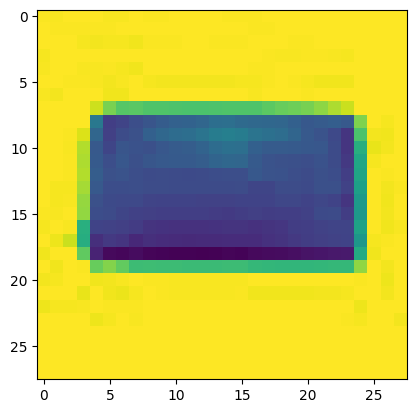

In [78]:
from tensorflow import image
sample_img = image.rgb_to_grayscale(img)

plt.imshow(sample_img)

In [79]:
import numpy as np
from numpy import asarray

img = asarray(sample_img)
img.shape

(28, 28, 1)

In [80]:
predict_class = model.predict(img.reshape(1,28,28,1))
predictions = predict_class.argmax(axis = -1)

1/1 [==============================] - 0s 73ms/step


In [81]:
predictions

array([8])